<h3 style="text-align: center;">
Emory University - Department of Economics
</h3>

<h4 style="text-align: center;">
RA Assignment - Prof. Maria Arbatskaya, Ph.D.
</h4>

<h5 style="text-align: center;">
Student: Jafet Baca-Obando 

Date: December 11th, 2023
</h5>

### Table of contents

0. Packages and some specific settings
1. Access Keepa API
2. Amazon categories
3. Product history query
4. Variation query
5. Top sellers query

### 0. Packages and some specific settings

In [1]:
pip install aiohttp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 7.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keepa


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install asyncio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 2.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aiohttp
import tqdm
import keepa
import os
import asyncio
import seaborn as sb

plt.style.use('seaborn-whitegrid') # Matplotlib style
plt.rcParams['figure.figsize'] = [6, 3] # Matplotlib figure size

# Set working directory (change to your own)
#path = "/Users/fareedkhan/Documents/Thesis"
#os.chdir(path)

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

### 1. Access Keepa API

In [33]:
# Read in Prof. Arbatskaya's API key
accesskey = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0' # enter real access key here
api = keepa.Keepa(accesskey)

### 2. Amazon Categories

In [10]:
categories = api.category_lookup(0) # api.category_lookup is a function defined by Keepa
for id in categories:
    print(id, categories[id]['name']) #37 root categories in total

133140011 Kindle Store
9013971011 Video Shorts
2350149011 Apps & Games
165796011 Baby Products
163856011 Digital Music
13727921011 Alexa Skills
165793011 Toys & Games
2972638011 Patio, Lawn & Garden
283155 Books
2617941011 Arts, Crafts & Sewing
229534 Software
3375251 Sports & Outdoors
2238192011 Gift Cards
468642 Video Games
11260432011 Handmade Products
7141123011 Clothing, Shoes & Jewelry
1064954 Office Products
16310101 Grocery & Gourmet Food
228013 Tools & Home Improvement
2625373011 Movies & TV
11091801 Musical Instruments
4991425011 Collectibles & Fine Art
2619525011 Appliances
2619533011 Pet Supplies
2335752011 Cell Phones & Accessories
16310091 Industrial & Scientific
10272111 Everything Else
5174 CDs & Vinyl
3760911 Beauty & Personal Care
1055398 Home & Kitchen
265523 Stores
172282 Electronics
15684181 Automotive
599858 Magazine Subscriptions
3760901 Health & Household
18145289011 Audible Books & Originals


### 3. Product History Query

In [11]:
# Access example product data (e.g., Apple EarPods Headphones with Lightning Connector)
products = api.query('B01M0GB8CC', domain = 'US', history = True,
                     rating = True) #List of products, even with one single request
product = products[0] #Access first product information

# Available variables
print(products[0].keys())

# Information of interest is stored in the 'data' key
print(product['data'].keys())

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

dict_keys(['csv', 'categories', 'imagesCSV', 'manufacturer', 'title', 'lastUpdate', 'lastPriceChange', 'rootCategory', 'productType', 'parentAsin', 'variationCSV', 'asin', 'domainId', 'type', 'hasReviews', 'trackingSince', 'brand', 'productGroup', 'partNumber', 'model', 'color', 'size', 'edition', 'format', 'packageHeight', 'packageLength', 'packageWidth', 'packageWeight', 'packageQuantity', 'isAdultProduct', 'isEligibleForTradeIn', 'isEligibleForSuperSaverShipping', 'offers', 'buyBoxSellerIdHistory', 'isRedirectASIN', 'isSNS', 'author', 'binding', 'numberOfItems', 'numberOfPages', 'publicationDate', 'releaseDate', 'languages', 'lastRatingUpdate', 'ebayListingIds', 'lastEbayUpdate', 'eanList', 'upcList', 'liveOffersOrder', 'frequentlyBoughtTogether', 'features', 'description', 'promotions', 'newPriceIsMAP', 'coupon', 'availabilityAmazon', 'listedSince', 'fbaFees', 'variations', 'itemHeight', 'itemLength', 'itemWidth', 'itemWeight', 'salesRankReference', 'salesRanks', 'salesRankReferenc

##### Accessing product information

In [12]:
# --- Auxiliary function 'extract'
def extract(product, data, info, var):
    "This function allows to extract the columns 'time' and 'value' that are stored in 'info', in turn stored in the dictionary 'data' of a specific product."
    "We rename the column  'value' as 'var'. Examples of value: Amazon rating, Amazon price, Amazon sales rank, etc."
    product[data][info]['time'] = product[data][info].index #Time is stored in the index, we create a column with this information
    name = f"product_{info}" #Name of the dataframe
    globals()[name] = pd.DataFrame(product[data][info]).reset_index(drop = True) #Create dataframe
    globals()[name] = globals()[name][['time', 'value']] #Keep only time and value columns
    globals()[name] = globals()[name].rename({'value': var}, axis = 1) #Rename value column as var
    return globals()[name] #Return dataframe

                 time  Amazon Price
0 2016-09-19 15:00:00           NaN
1 2016-10-15 04:12:00         29.00
2 2016-10-26 19:56:00           NaN
3 2016-10-27 17:24:00         28.75
4 2016-10-29 01:44:00         29.00
5 2016-11-01 15:32:00           NaN
6 2016-11-04 13:18:00         29.00
7 2016-11-11 02:46:00           NaN
8 2016-11-17 10:04:00         29.00
9 2016-11-17 17:08:00           NaN


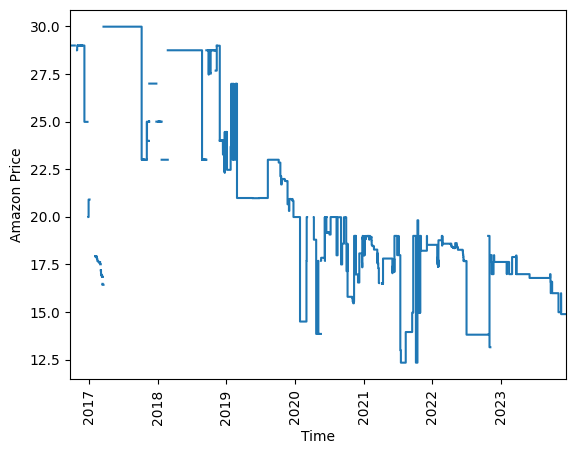

In [13]:
# --- Amazon price history
amazon_price = extract(product, 'data', 'df_AMAZON', 'Amazon Price')
print(amazon_price.head(10))

amazon_price['time'] = pd.to_datetime(amazon_price['time'])

# Remove non-numeric characters from 'Amazon Price' and convert to float
amazon_price['Amazon Price'] = amazon_price['Amazon Price'].replace('[\$,]', '', regex=True).astype(float)

time_data = amazon_price['time'].values
price_data = amazon_price['Amazon Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting x-axis limits to cover the full range of time data
ax.set_xlim(time_data.min(), time_data.max())

# Setting labels and rotating date labels for clarity
ax.set(xlabel='Time', ylabel='Amazon Price')
plt.xticks(rotation='vertical')

plt.show()

                 time  Marketplace Price
0 2016-09-19 15:00:00              30.50
1 2016-10-06 15:08:00              20.00
2 2016-10-07 22:40:00              30.50
3 2016-10-09 15:36:00              22.99
4 2016-10-12 04:52:00              19.99
5 2016-10-15 04:12:00              29.00
6 2016-10-26 19:56:00              30.50
7 2016-10-27 17:24:00              28.75
8 2016-10-29 01:44:00              29.00
9 2016-11-01 15:32:00              30.50


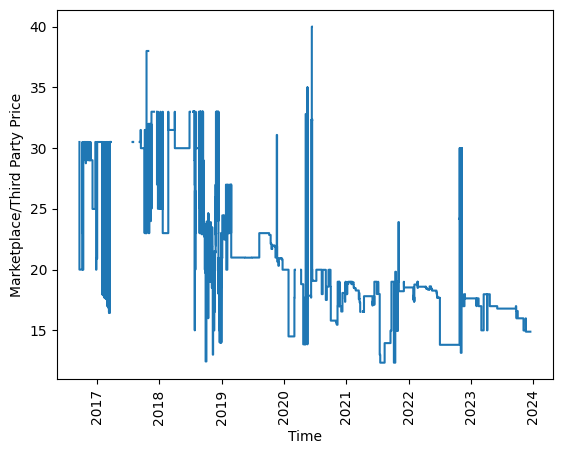

In [14]:
# --- Marketplace/3rd party new price history
marketplace_price = extract(product, 'data', 'df_NEW', 'Marketplace Price')
print(marketplace_price.head(10))

marketplace_price['Marketplace Price'] = marketplace_price['Marketplace Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'time' and 'Marketplace Price' to numpy arrays for plotting
time_data = marketplace_price['time'].values
price_data = marketplace_price['Marketplace Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting axes labels and rotating the x-axis labels for better readability
ax.set(xlabel='Time', ylabel='Marketplace/Third Party Price')
plt.xticks(rotation='vertical')

plt.show()


                 time  List Price
0 2016-10-15 04:12:00       29.00
1 2016-12-27 07:24:00       44.99
2 2017-02-22 15:00:00       17.64
3 2017-02-22 23:44:00         NaN
4 2017-02-27 03:48:00       17.62
5 2017-02-27 11:32:00         NaN
6 2017-03-02 11:00:00       17.52
7 2017-03-03 02:56:00       17.51
8 2017-03-03 10:42:00         NaN
9 2017-03-04 00:40:00       17.51


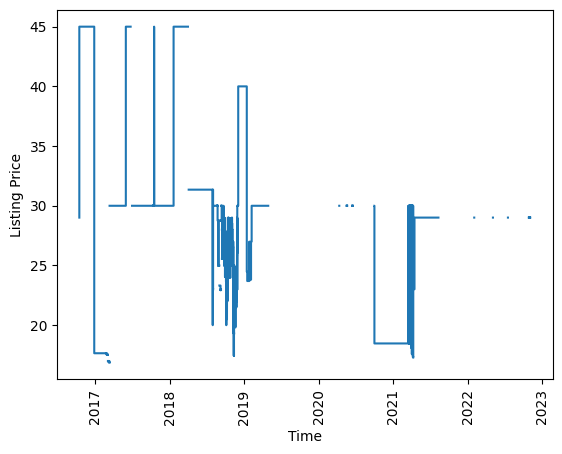

In [15]:
# --- List price history

list_price = extract(product, 'data', 'df_LISTPRICE', 'List Price')
print(list_price.head(10))
list_price['List Price'] = list_price['List Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'time' and 'List Price' to numpy arrays for plotting
time_data = list_price['time'].values
listprice_data = list_price['List Price'].values

fig, ax = plt.subplots()
plt.step(time_data, listprice_data)
ax.set(xlabel='Time', ylabel='Listing Price')
plt.xticks(rotation='vertical')

plt.show()

                 time  Sales Rank
0 2016-09-19 15:00:00          -1
1 2017-05-08 08:44:00        1118
2 2017-05-08 11:08:00        1134
3 2017-05-08 13:44:00        1022
4 2017-05-08 16:18:00         682
5 2017-05-08 19:16:00         592
6 2017-05-08 21:24:00         611
7 2017-05-09 03:36:00         635
8 2017-05-09 06:24:00         641
9 2017-05-09 09:44:00         672


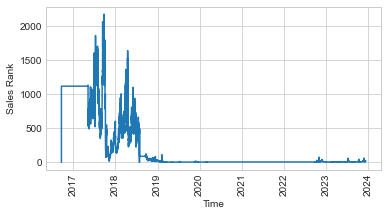

In [104]:
# --- Sales rank history
sales_rank = extract(product, 'data', 'df_SALES', 'Sales Rank')
print(sales_rank.head(10))
time_data = sales_rank['time'].values
sales_rank_data = sales_rank['Sales Rank'].values

fig, ax = plt.subplots()
plt.step(time_data, sales_rank_data)
ax.set(xlabel='Time', ylabel='Sales Rank')
plt.xticks(rotation='vertical')

plt.show()

                 time  Rating
0 2017-01-08 19:00:00     3.4
1 2017-01-23 16:36:00     3.5
2 2017-01-30 13:36:00     3.4
3 2017-01-30 21:32:00     3.2
4 2017-02-01 03:20:00     3.3
5 2017-02-02 06:04:00     3.2
6 2017-02-02 18:36:00     3.1
7 2017-02-06 16:48:00     3.2
8 2017-02-08 04:56:00     3.0
9 2017-02-11 00:08:00     3.1


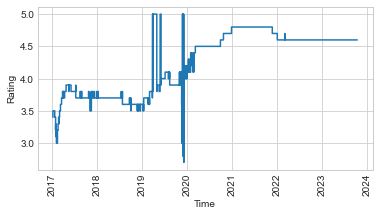

In [105]:
# --- Rating history
rating = extract(product, 'data', 'df_RATING', 'Rating')
print(rating.head(10))

rating['time'] = pd.to_datetime(rating['time'])
rating['Rating'] = pd.to_numeric(rating['Rating'], errors='coerce')  # Coerce non-numeric to NaN

# Drop rows with NaN values in either column
rating.dropna(subset=['time', 'Rating'], inplace=True)

# Convert to numpy arrays
time_data = rating['time'].values
rating_data = rating['Rating'].values

# Ensure both arrays have the same length
if len(time_data) != len(rating_data):
    raise ValueError("Length of 'time' and 'Rating' do not match")

# Plotting
fig, ax = plt.subplots()
plt.step(time_data, rating_data)
ax.set(xlabel='Time', ylabel='Rating')
plt.xticks(rotation='vertical')

plt.show()

                 time  Review Count
0 2017-01-08 19:00:00            11
1 2017-01-20 14:32:00            13
2 2017-01-23 16:36:00            14
3 2017-01-30 13:36:00            16
4 2017-01-30 21:32:00            17
5 2017-02-01 03:20:00            18
6 2017-02-02 06:04:00            19
7 2017-02-02 18:36:00            20
8 2017-02-06 16:48:00            21
9 2017-02-08 04:56:00            23
Time Data Shape: (31770,)
Review Count Data Shape: (31770,)


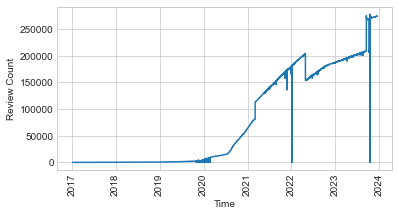

In [106]:
# --- Review count history
review_count = extract(product, 'data', 'df_COUNT_REVIEWS', 'Review Count')
print(review_count.head(10))

review_count.dropna(subset=['time', 'Review Count'], inplace=True)

# Convert to numpy arrays
time_data = review_count['time'].values
review_count_data = review_count['Review Count'].values

# Diagnostic print statements
print("Time Data Shape:", time_data.shape)
print("Review Count Data Shape:", review_count_data.shape)

# Ensure both arrays have the same length
if len(time_data) != len(review_count_data):
    raise ValueError("Length of 'time' and 'Review Count' do not match")

# Plotting
fig, ax = plt.subplots()
plt.step(time_data, review_count_data)
ax.set(xlabel='Time', ylabel='Review Count')
plt.xticks(rotation='vertical')

plt.show()

### 4. Variation Query

In [16]:
#Identify the ASINs of the variations of the Apple EarPods Headphones with Lightning Connector
print(product['variations'])
asins = [variation['asin'] for variation in product['variations']] #Variations are stored in a list of dictionaries called 'variations'
asins = np.asarray(asins) #Convert list to numpy array
print(asins)

[{'asin': 'B06X16Z7DZ', 'attributes': [{'dimension': 'Style', 'value': '3.5mm Aux'}]}, {'asin': 'B01M0GB8CC', 'attributes': [{'dimension': 'Style', 'value': 'Lighting'}]}, {'asin': 'B0CHXC5ZDX', 'attributes': [{'dimension': 'Style', 'value': 'USB-C'}]}]
['B06X16Z7DZ' 'B01M0GB8CC' 'B0CHXC5ZDX']


In [17]:
# Query info on variations
list_products = api.query(asins, domain = 'US', history = True, rating = True) #api.query is a function defined by Keepa

100%|██████████| 3/3 [00:01<00:00,  1.68it/s]


In [18]:
# Obtain data for each variation
for index, product in enumerate(list_products, start = 1):
    info_name = f"product{index}"
    globals()[info_name] = product

In [19]:
# Auxiliary function to extract the data of all the identified variations
def capture(product, data):
    values = {} #Create empty dictionary
    values['amazon_price'] = extract(product, 'data', 'df_AMAZON', 'Amazon Price') #Extract Amazon price
    values['marketplace_price'] = extract(product, 'data', 'df_NEW', 'Marketplace Price') #Extract Marketplace price
    values['list_price'] = extract(product, 'data', 'df_LISTPRICE', 'List Price') #Extract List price
    values['sales_rank'] = extract(product, 'data', 'df_SALES', 'Sales Rank') #Extract Sales rank
    values['rating'] = extract(product, 'data', 'df_RATING', 'Rating') #Extract Rating
    values['review_count'] = extract(product, 'data', 'df_COUNT_REVIEWS', 'Review Count') #Extract Review count
    return values

In [20]:
# Example: Extract data for the first variation (i.e., product1)
product1_data = capture(product1, 'data')
product1_amazon_price = product1_data['amazon_price']
product1_marketplace_price = product1_data['marketplace_price']
product1_list_price = product1_data['list_price']
product1_sales_rank = product1_data['sales_rank']
product1_rating = product1_data['rating']
product1_review_count = product1_data['review_count']
print(product1_data)

{'amazon_price':                    time  Amazon Price
0   2016-09-19 15:00:00           NaN
1   2016-10-15 04:12:00         29.00
2   2016-10-26 19:56:00           NaN
3   2016-10-27 17:24:00         28.75
4   2016-10-29 01:44:00         29.00
..                  ...           ...
639 2023-11-05 14:00:00         15.99
640 2023-11-13 09:52:00         14.99
641 2023-11-19 06:10:00         15.00
642 2023-11-19 14:08:00         15.99
643 2023-12-15 18:28:00         14.89

[644 rows x 2 columns], 'marketplace_price':                    time  Marketplace Price
0   2016-09-19 15:00:00              30.50
1   2016-10-06 15:08:00              20.00
2   2016-10-07 22:40:00              30.50
3   2016-10-09 15:36:00              22.99
4   2016-10-12 04:52:00              19.99
..                  ...                ...
732 2023-11-05 13:56:00              15.99
733 2023-11-13 09:52:00              14.99
734 2023-11-19 06:10:00              15.00
735 2023-11-19 14:08:00              15.99
736 2023

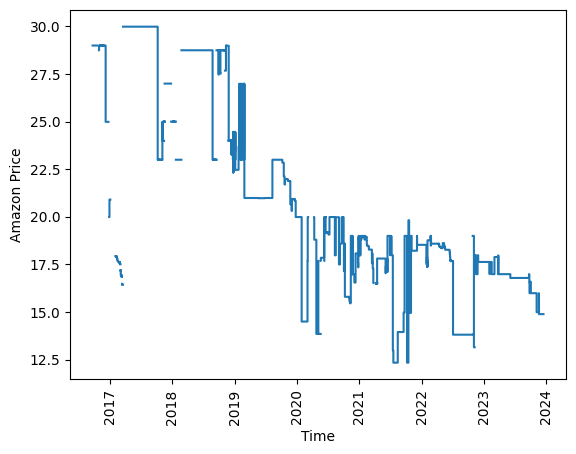

In [21]:
# Plot Amazon price history for the first variation
product1_amazon_price['Amazon Price'] = product1_amazon_price['Amazon Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'time' to datetime format (if not already in this format)
product1_amazon_price['time'] = pd.to_datetime(product1_amazon_price['time'])

# Extracting values for plotting
time_data = product1_amazon_price['time'].values
amazon_price_data = product1_amazon_price['Amazon Price'].values

# Plotting
fig, ax = plt.subplots()
plt.step(time_data, amazon_price_data)
ax.set(xlabel='Time', ylabel='Amazon Price')
plt.xticks(rotation='vertical')
plt.show()

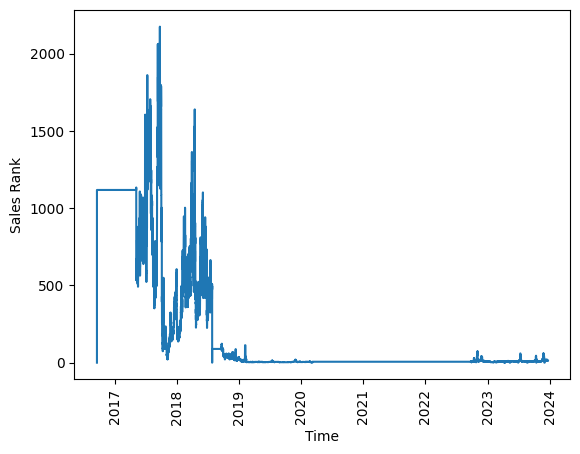

In [22]:
# Plot sales rank history for the first variation
time_data = product1_data['sales_rank']['time'].values
sales_rank_data = product1_data['sales_rank']['Sales Rank'].values

# Plotting the sales rank history
fig, ax = plt.subplots()
plt.step(time_data, sales_rank_data)
ax.set(xlabel='Time', ylabel='Sales Rank')
plt.xticks(rotation='vertical')

plt.show()

### 5. Top Sellers Query

In [23]:
# Query 'Health & Household' category
hh_bestsellers = api.best_sellers_query('3760901', domain = 'US')
len(hh_bestsellers) #The query gets the top 500,000 selling products in the category

500000

In [24]:
# Print top 10 bestsellers of HH as of 2023-12-12
for bestseller in hh_bestsellers[:10]:
    print(bestseller)

B01B8R6PF2
B07KX2N355
B09RTVD1GF
B07MHJFRBJ
B07F1GRW8R
B071D4DKTZ
B09RTVN5GN
B0CMRWZFN5
B079H53D2B
B074CRK54X


In [25]:
# Use the ASINs to query the top 10 bestsellers
hh_asins = hh_bestsellers[:10]
list_products = api.query(hh_asins, domain = 'US', history = True, rating = True)

100%|██████████| 10/10 [00:02<00:00,  4.07it/s]


In [26]:
# Names of the top 10 bestsellers
for index, product in enumerate(list_products, start=1):
    print(f"Product {index}: ASIN - {product['asin']}, Name - {product['title']}")


Product 1: ASIN - B01B8R6PF2, Name - Amazon Basics 100-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life
Product 2: ASIN - B071D4DKTZ, Name - LiCB CR2032 3V Lithium Battery(10-Pack)
Product 3: ASIN - B074CRK54X, Name - Amazon Brand - Presto! 2-Ply Toilet Paper, Ultra-Soft, Unscented, 24 Rolls (4 Packs of 6), Equivalent to 120 regular rolls
Product 4: ASIN - B079H53D2B, Name - Physician's CHOICE Probiotics 60 Billion CFU - 10 Strains + Organic Prebiotics - Digestive & Gut Health - Supports Occasional Constipation, Diarrhea, Gas & Bloating - For Women & Men - 30ct
Product 5: ASIN - B07F1GRW8R, Name - Liquid I.V. Hydration Multiplier - Acai Berry - Hydration Powder Packets | Electrolyte Drink Mix | Easy Open Single-Serving Stick | Non-GMO | 96 Sticks
Product 6: ASIN - B07KX2N355, Name - Amazon Basics 12-Pack AAA Alkaline Batteries, 1.5 Volt, Long-Lasting Power
Product 7: ASIN - B07MHJFRBJ, Name - Bounty Quick Size Paper Towels, White, 8 Family Rolls = 20 Regular Ro

### 6. Individual Price and Sales Rank Variant Comparison

In [27]:
# Access example product data (e.g., Apple EarPods Headphones with Lightning Connector)
products2 = api.query('B00OBQZDXS', domain = 'US', history = True,
                     rating = True) #List of products, even with one single request
product2 = products2[0] #Access first product information

# Available variables
print(products2[0].keys())

# Information of interest is stored in the 'data' key
print(product2['data'].keys())

100%|██████████| 1/1 [00:02<00:00,  2.08s/it]

dict_keys(['csv', 'categories', 'imagesCSV', 'manufacturer', 'title', 'lastUpdate', 'lastPriceChange', 'rootCategory', 'productType', 'parentAsin', 'variationCSV', 'asin', 'domainId', 'type', 'hasReviews', 'trackingSince', 'brand', 'productGroup', 'partNumber', 'model', 'color', 'size', 'edition', 'format', 'packageHeight', 'packageLength', 'packageWidth', 'packageWeight', 'packageQuantity', 'isAdultProduct', 'isEligibleForTradeIn', 'isEligibleForSuperSaverShipping', 'offers', 'buyBoxSellerIdHistory', 'isRedirectASIN', 'isSNS', 'author', 'binding', 'numberOfItems', 'numberOfPages', 'publicationDate', 'releaseDate', 'languages', 'lastRatingUpdate', 'ebayListingIds', 'lastEbayUpdate', 'eanList', 'upcList', 'liveOffersOrder', 'frequentlyBoughtTogether', 'features', 'description', 'promotions', 'newPriceIsMAP', 'coupon', 'availabilityAmazon', 'listedSince', 'fbaFees', 'variations', 'itemHeight', 'itemLength', 'itemWidth', 'itemWeight', 'salesRankReference', 'salesRanks', 'salesRankReferenc

In [28]:
# --- Auxiliary function 'extract'
def extract(product2, data, info, var):
    "This function allows to extract the columns 'time' and 'value' that are stored in 'info', in turn stored in the dictionary 'data' of a specific product."
    "We rename the column  'value' as 'var'. Examples of value: Amazon rating, Amazon price, Amazon sales rank, etc."
    product2[data][info]['time'] = product2[data][info].index #Time is stored in the index, we create a column with this information
    name = f"product2_{info}" #Name of the dataframe
    globals()[name] = pd.DataFrame(product2[data][info]).reset_index(drop = True) #Create dataframe
    globals()[name] = globals()[name][['time', 'value']] #Keep only time and value columns
    globals()[name] = globals()[name].rename({'value': var}, axis = 1) #Rename value column as var
    return globals()[name] #Return dataframe

                 time  Amazon Price
0 2023-11-06 20:28:00           NaN
1 2023-11-19 19:08:00         32.99
2 2023-11-21 10:16:00         38.44
3 2023-11-21 14:02:00         26.96
4 2023-11-22 02:40:00         27.76
5 2023-11-22 10:00:00         26.43
6 2023-11-23 12:08:00         21.39
7 2023-11-24 02:08:00         26.67
8 2023-11-24 08:12:00         25.39
9 2023-11-24 18:24:00         25.90
2023-11-06T20:28:00.000000000 2023-12-20T03:40:00.000000000


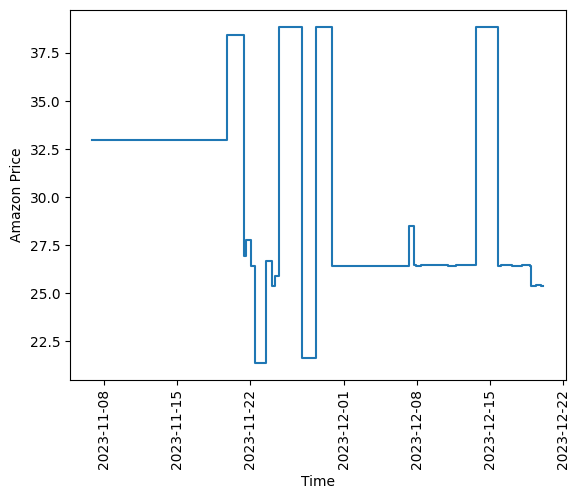

In [29]:
# --- Amazon price history
amazon_price = extract(product, 'data', 'df_AMAZON', 'Amazon Price')
print(amazon_price.head(10))

amazon_price['time'] = pd.to_datetime(amazon_price['time'])

# Remove non-numeric characters from 'Amazon Price' and convert to float
amazon_price['Amazon Price'] = amazon_price['Amazon Price'].replace('[\$,]', '', regex=True).astype(float)

time_data = amazon_price['time'].values
price_data = amazon_price['Amazon Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting x-axis limits to cover the full range of time data
print(time_data.min(), time_data.max())
# Setting labels and rotating date labels for clarity
ax.set(xlabel='Time', ylabel='Amazon Price')
plt.xticks(rotation='vertical')

plt.show()

100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


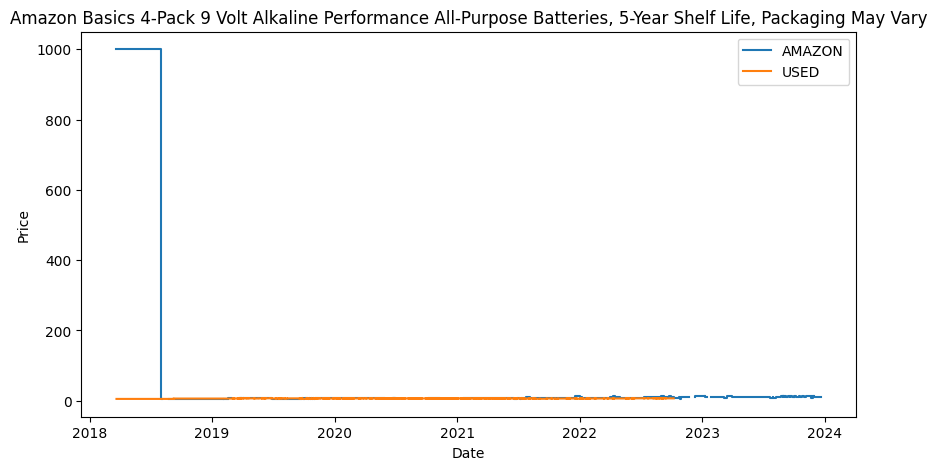

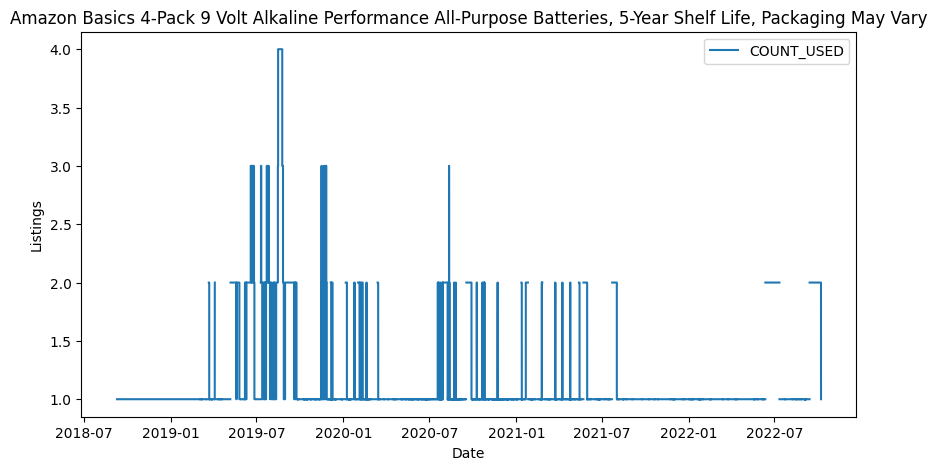

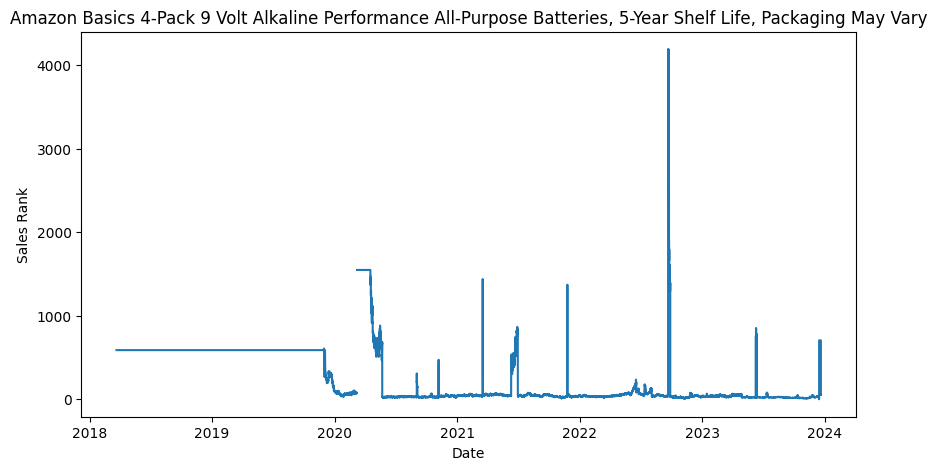

<Figure size 640x480 with 0 Axes>

In [30]:
api = keepa.Keepa(accesskey)

# Single ASIN query
asins = np.asarray(['B0774D64LT'])
products = api.query(asins)


# Plot result (requires matplotlib)
keepa.plot_product(products[0])

In [31]:
asins = ['B002UXRXE6', 'B000HI6CEI', 'B09LCGMW4K', 'B006CSQXLO', 
                      'B00000JHQ0', 'B002UXRXE6', 'B004K95PBQ', 'B07ZWPZRZ2', 
                      'B08W1NX12B', 'B004M7YC8S', 'B00005T3E4', 'B002XK36M4']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if price history (Amazon price) is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        if timestamps and prices:
            # Convert Keepa timestamps to datetime objects for plotting
            dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

            # Plot each product's Amazon price history
            plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of Duracell Coppertop AAA Batteries with Power Boost Ingredients, 20 Count Pack & Its Variants')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


100%|██████████| 11/11 [00:02<00:00,  4.05it/s]


NameError: name 'datetime' is not defined

<Figure size 1200x600 with 0 Axes>

100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

[datetime.datetime(1980, 11, 16, 12, 12), datetime.datetime(1981, 1, 13, 4, 18), datetime.datetime(1981, 1, 15, 0, 4), datetime.datetime(1981, 3, 13, 15, 26), datetime.datetime(1981, 4, 3, 20, 24), datetime.datetime(1981, 4, 18, 6, 16), datetime.datetime(1981, 4, 26, 16, 38), datetime.datetime(1981, 4, 26, 19, 38), datetime.datetime(1981, 4, 27, 1, 38), datetime.datetime(1981, 4, 27, 13, 48), datetime.datetime(1981, 4, 28, 1, 50), datetime.datetime(1981, 4, 29, 4, 48), datetime.datetime(1981, 4, 29, 13, 48), datetime.datetime(1981, 4, 29, 16, 36), datetime.datetime(1981, 4, 30, 12, 58), datetime.datetime(1981, 5, 1, 12, 44), datetime.datetime(1981, 5, 1, 14, 36), datetime.datetime(1981, 5, 11, 14, 32), datetime.datetime(1981, 5, 12, 6, 8), datetime.datetime(1981, 5, 22, 3, 32), datetime.datetime(1981, 5, 23, 2, 28), datetime.datetime(1981, 5, 25, 6, 12), datetime.datetime(1981, 5, 26, 15, 58), datetime.datetime(1981, 6, 30, 12, 42), datetime.datetime(1981, 7, 3, 10, 4), datetime.dateti

ValueError: x and y must have same first dimension, but have shapes (199,) and (70,)

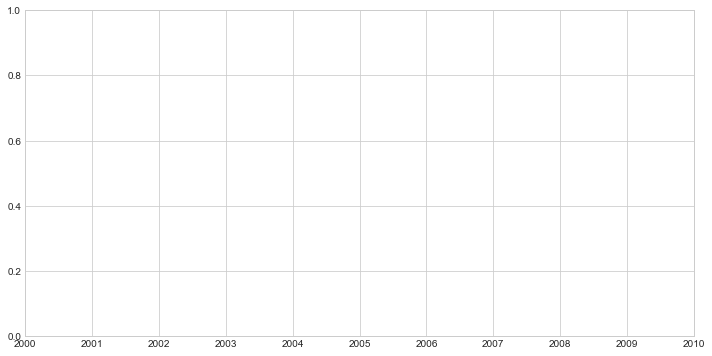

100%|██████████| 11/11 [00:05<00:00,  1.94it/s]


In [211]:
import matplotlib.dates as mdates
from datetime import datetime
asins = ['B002UXRXE6', 'B000HI6CEI', 'B09LCGMW4K', 'B006CSQXLO', 
         'B00000JHQ0', 'B002UXRXE6', 'B004K95PBQ', 'B07ZWPZRZ2', 
         'B08W1NX12B', 'B004M7YC8S', 'B00005T3E4', 'B002XK36M4']

# Query Keepa for the products
products = api.query(asins)

# Plotting
plt.figure(figsize=(12, 6))

for product in products:
    # Check if CSV data is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        # Initialize lists for timestamps and prices
        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        print(dates)
        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


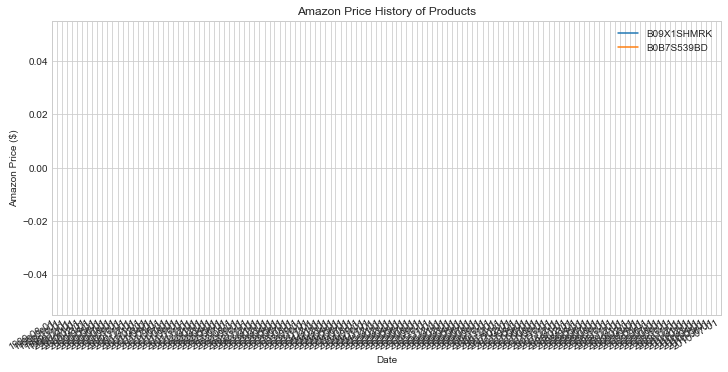

In [188]:
import matplotlib.dates as mdates
from datetime import datetime
asins = ['B0B7S539BD','B09X1SHMRK']

# Query Keepa for the products
products = api.query(asins)

# Plotting
plt.figure(figsize=(12, 6))

for product in products:
    # Check if CSV data is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        # Initialize lists for timestamps and prices
        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])


# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format date labels

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

100%|██████████| 5/5 [00:01<00:00,  3.40it/s]


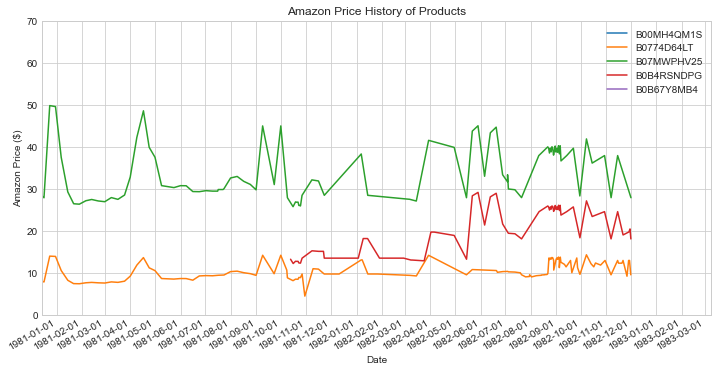

In [232]:
asins = ['B00MH4QM1S','B0B67Y8MB4','B0774D64LT','B0B4RSNDPG','B07MWPHV25']

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if CSV data is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

       
        # Initialize lists for timestamps and prices
        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format date labels
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

plt.xlim(xmin=4000)
plt.ylim(ymin=0, ymax=70)
# Display the plot
plt.show()

100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


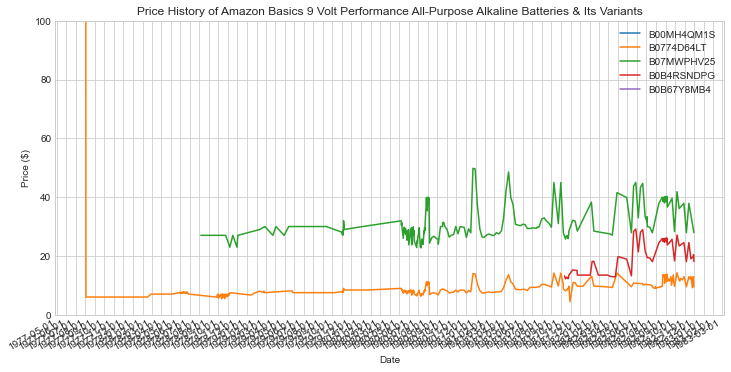

In [229]:
import keepa
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ASINs for the products
asins = ['B00MH4QM1S','B0B67Y8MB4','B0774D64LT','B0B4RSNDPG','B07MWPHV25']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if price history (Amazon price) is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        # Iterate over the csv_data list, treating even indices as timestamps and odd indices as prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps (minutes since epoch) to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of Amazon Basics 9 Volt Performance All-Purpose Alkaline Batteries & Its Variants')
plt.legend()
plt.grid(True)
plt.gca().set_ylim(bottom=0, top=100)

# Display the plot
plt.show()

100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


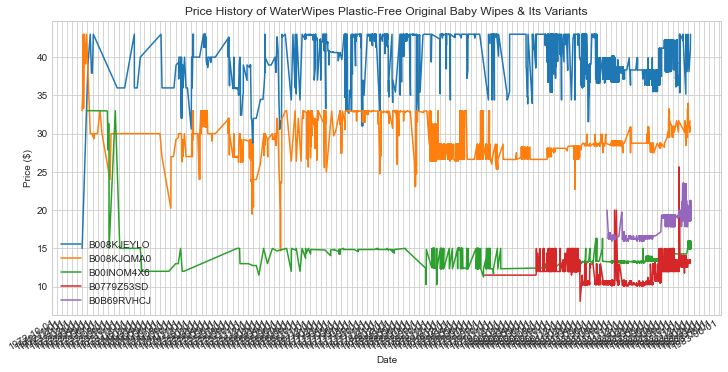

In [228]:
# ASINs for the products
asins = ['B0779Z53SD','B00INOM4X6','B0B69RVHCJ','B008KJQMA0','B008KJEYLO']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if price history (Amazon price) is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        # Iterate over the csv_data list, treating even indices as timestamps and odd indices as prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps (minutes since epoch) to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of WaterWipes Plastic-Free Original Baby Wipes & Its Variants')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Creating Dataset

In [44]:
import keepa
import pandas as pd


accesskey = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0' # enter real access key here


# Connect to the Keepa API
api = keepa.Keepa(accesskey)

# Get the category ID for 'Health and Household'
category_id = '3760901'
# Fetch top 100 ASINs in this category
top_products = api.best_sellers_query(category_id)[:1]

# Query detailed data for each product
product_data = api.query(top_products)

# Extract and organize required data into a pandas DataFrame
data = []
for product in product_data:
    # Extracting individual fields from each product
    print(product['data'])
    entry = {
        'Title': product['title'],
        'Sales Rank 90 Day Avg': product['data']['SALES'] if 'SALES' in product['data'] else None,
        'Rating': product['data']['RATING'] if 'RATING' in product['data'] else None,
        
    }
    data.append(entry)

df = pd.DataFrame(data)


Waiting 814 seconds for additional tokens


In [ ]:
import keepa
import pandas as pd


accesskey = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0' # enter real access key here


# Connect to the Keepa API
api = keepa.Keepa(accesskey)

# Get the category ID for 'Health and Household'
category_id = '3760901'
# Fetch top 100 ASINs in this category
top_products = api.best_sellers_query(category_id)[:1]

# Query detailed data for each product
product_data = api.query(top_products)

# Extract and organize required data into a pandas DataFrame
data = []
for product in product_data:
    # Extracting individual fields from each product
    print(product['data'])
    entry = {
        'Title': product['title'],
        'Sales Rank 90 Day Avg': product['data']['SALES'] if 'SALES' in product['data'] else None,
        'Rating': product['data']['RATING'] if 'RATING' in product['data'] else None,
        
    }
    data.append(entry)

df = pd.DataFrame(data)


In [ ]:
print(product_data)

In [40]:
df


,Title,Sales Rank 90 Day Avg,Reviews: Rating
0,"Energizer 2032 3V Batteries, 3 Volt Battery Li...","[3128, 2629, 2878, 3914, 3558, 2847, 3819, 398...",None
1,"Clorox Disinfecting Wipes, Fresh Scent, 35-ct","[462979, 483367, 506365, 525999, 545548, 56832...",None
2,Optimum Nutrition Gold Standard 100% Whey Prot...,"[1507, 1893, 1733, 1894, 1595, 1610, 1379, 977...",None
3,Band-Aid Brand Flexible Fabric Adhesive Bandag...,"[12662, 12738, 10222, 11598, 12321, 12370, 126...",None
4,Pure Encapsulations Magnesium (Glycinate) - Su...,"[9096, 6261, 11510, 8165, 7476, 5316, 6277, 65...",None
...,...,...,...
95,Philips Sonicare Genuine C2 Optimal Plaque Con...,"[-1, 215, 233, 203, 218, 207, 196, 199, 219, 2...",None
96,"Powermax 48-Count AA Batteries, Ultra Long Las...","[-1, 783, 761, 778, 731, 630, 694, 742, 720, 6...",None
97,Stardrops - The Pink Stuff - The Miracle All P...,"[33, 35, 31, 28, 32, 30, 32, 35, 32, 36, 35, 3...",None
98,Loop Quiet Equinox Earplugs – Reusable Noise-R...,"[193, 195, 215, 190, 235, 231, 211, -1, 217, 2...",None
